<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 06: Proyectos de Machine Learning

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
* __La entrega es al final de esta clase.__

__Nombre__: Ricardo Elías Ávalos Rojas

__Rol__: 201403036-3

## GapMinder

In [1]:
import pandas as pd
import altair as alt

from vega_datasets import data

alt.themes.enable('opaque')

%matplotlib inline

In [2]:
gapminder = data.gapminder_health_income()
gapminder.head()

,country,income,health,population
0,Afghanistan,1925,57.63,32526562
1,Albania,10620,76.00,2896679
2,Algeria,13434,76.50,39666519
3,Andorra,46577,84.10,70473
4,Angola,7615,61.00,25021974


### 1. Análisis exploratorio (1 pto)

Como mínimo, realizar un `describe` del dataframe y una visualización adecuada, una _scatter matrix_ con los valores numéricos.

In [3]:
gapminder.describe().T

,count,mean,std,min,25%,50%,75%,max
income,187.0,1.723224e+04,1.931063e+04,599.0,3585.5,10996.00,23834.0,1.328770e+05
health,187.0,7.167326e+01,7.748959e+00,48.5,65.5,73.13,77.7,8.410000e+01
population,187.0,3.908887e+07,1.432898e+08,52993.0,2248920.0,8544586.00,27693878.0,1.376049e+09


In [16]:
# gapminder_graficable=gapminder.copy() #Recuerdo que en la ultima clase dijo que le cambiaramos los nombres a los ejes si que para eso es esto
#Finalmente nada de esto era necesario, porque nunca piden datos para esto.

# gapminder_graficable.rename(columns={'income': 'ingreso', 'health': 'salud', 'population':'poblacion'}, inplace=True) 
# gapminder_graficable.head()

gapminder.rename(columns={'income': 'ingreso', 'health': 'salud', 'population':'poblacion'}, inplace=True) 
gapminder.head()

,country,ingreso,salud,poblacion
0,Afghanistan,1925,57.63,32526562
1,Albania,10620,76.00,2896679
2,Algeria,13434,76.50,39666519
3,Andorra,46577,84.10,70473
4,Angola,7615,61.00,25021974


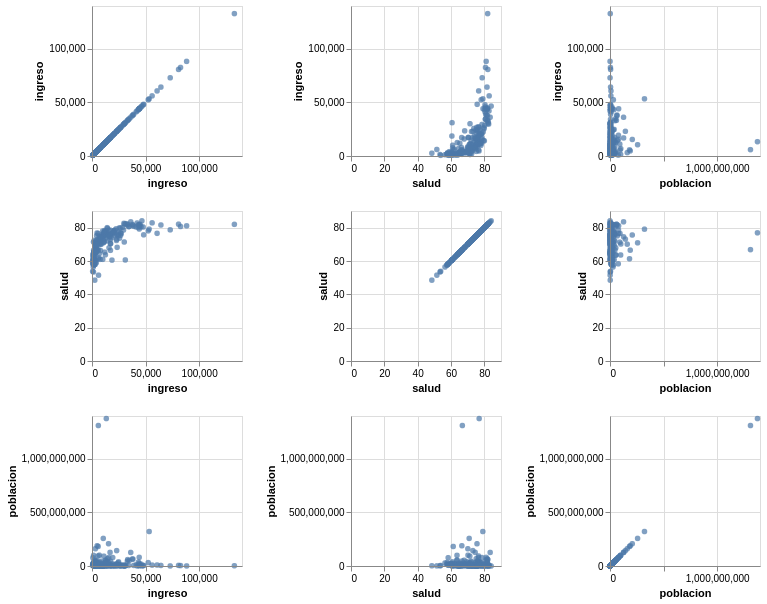

In [17]:
alt.Chart(gapminder).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
width=150 , 
    height=150
).repeat(
    row=["ingreso","salud","poblacion"],
    column=["ingreso","salud","poblacion"]
)

### 2. Preprocesamiento (1 pto)

Aplicar un escalamiento a los datos antes de aplicar nuestro algoritmo de clustering. Para ello, definir la variable `X_raw` que corresponde a un `numpy.array` con los valores del dataframe `gapminder` en las columnas _income_, _health_ y  _population_. Luego, definir la variable `X` que deben ser los datos escalados de `X_raw`.

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
X_raw = np.array(gapminder[["ingreso","salud","poblacion"]])
X = StandardScaler().fit_transform(X_raw)

### 3. Clustering (1 pto)

In [19]:
from sklearn.cluster import KMeans

Definir un _estimator_ `KMeans` con `k=3` y `random_state=42`, luego ajustar con `X` y finalmente, agregar los _labels_ obtenidos a una nueva columna del dataframe `gapminder` llamada `cluster`. Finalmente, realizar el mismo gráfico del principio pero coloreado por los clusters obtenidos.



In [24]:
k = 3
kmeans =KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
gapminder=gapminder.assign(cluster=clusters)

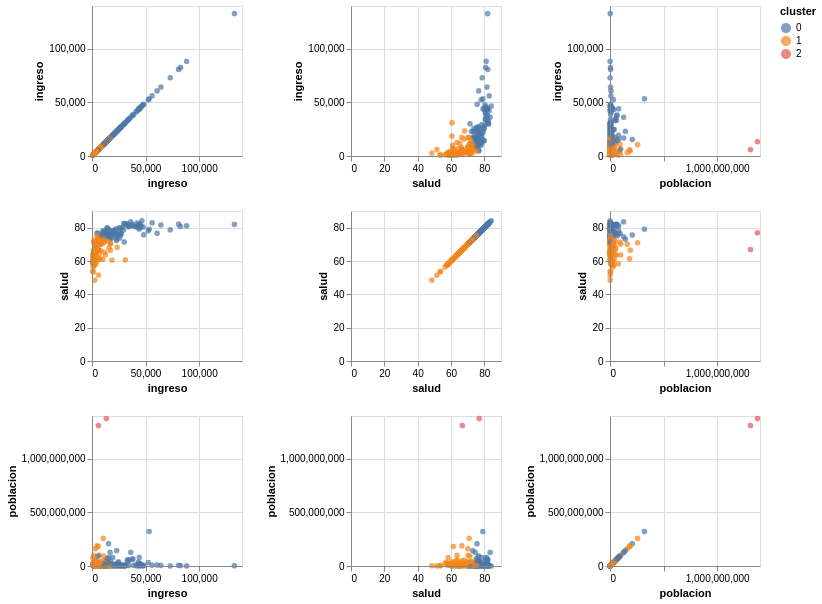

In [25]:
alt.Chart(gapminder).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color('cluster:N')
).properties(
width=150 , 
    height=150
).repeat(
    row=["ingreso","salud","poblacion"],
    column=["ingreso","salud","poblacion"]
)

### 4. Regla del codo (1 pto)

__¿Cómo escoger la mejor cantidad de _clusters_?__

En este ejercicio hemos utilizado que el número de clusters es igual a 3. El ajuste del modelo siempre será mejor al aumentar el número de clusters, pero ello no significa que el número de clusters sea el apropiado. De hecho, si tenemos que ajustar $n$ puntos, claramente tomar $n$ clusters generaría un ajuste perfecto, pero no permitiría representar si existen realmente agrupaciones de datos.

Cuando no se conoce el número de clusters a priori, se utiliza la [regla del codo](https://jarroba.com/seleccion-del-numero-optimo-clusters/), que indica que el número más apropiado es aquel donde "cambia la pendiente" de decrecimiento de la la suma de las distancias a los clusters para cada punto, en función del número de clusters.

A continuación se provee el código para el caso de clustering sobre los datos estandarizados, leídos directamente de un archivo preparado especialmente.

In [26]:
elbow = pd.Series(name="inertia").rename_axis(index="k")
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    elbow.loc[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
elbow = elbow.reset_index()

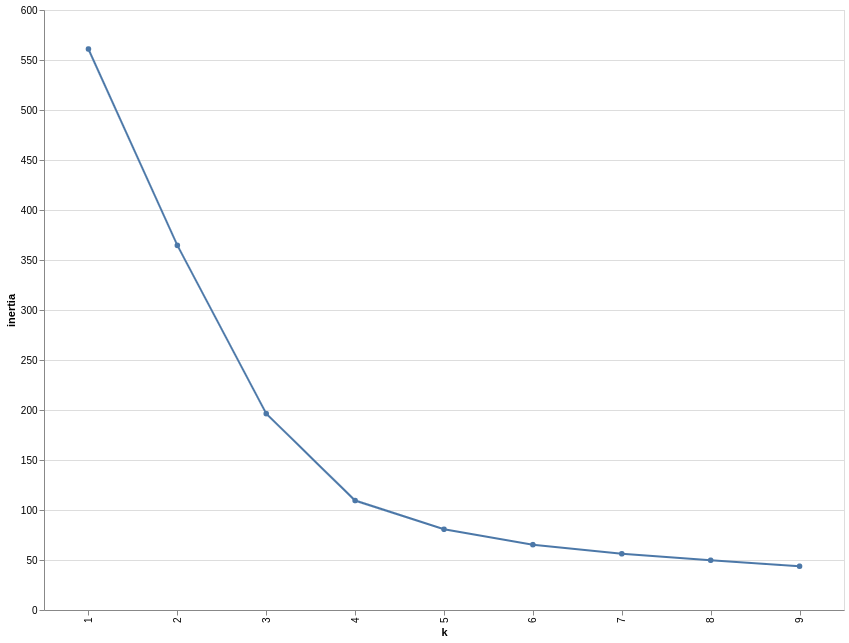

In [27]:
alt.Chart(elbow).mark_line(point=True).encode(
    x="k:O",
    y="inertia:Q"
).properties(
    height=600,
    width=800
)

__Pregunta__

Considerando los datos (países) y el gráfico anterior, ¿Cuántos clusters escogerías?

Dado que tenemos 9 cluster graficados, me inclino por el 4, pues es un numero que presenta un cambio significativo de la pendiente y a la vez, no esta tan cerca del numero máximo (en este caso 10)